In [1]:
import numpy as np
from tc_utils import *

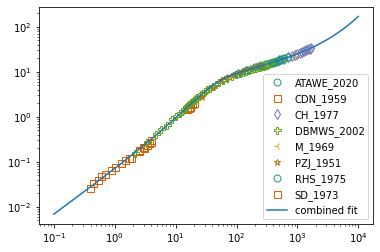

In [2]:
TCdata = np.loadtxt("..\\thermal_conductivity_compilation.csv", dtype=str, delimiter=',')
headers = TCdata[0]
mat_row = TCdata[1]
num_hi = sum(1 for c in headers[4:] if c.isupper())
num_low = sum(1 for c in headers[4:-1] if c.islower())
fit_params = mat_row[4:]
low_param, hi_param, erf_param = np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])


mat = "SS304"
xs = np.logspace(-1,4,100)
big_data, data_dict = parse_raw(mat, f"lib\{mat}\RAW", plots=False)
plot_datapoints(data_dict)
plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param), label='combined fit')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()